## <font color = Blue>  Dataset
<font color = Blue>***This file contains daily numbers of covid-19 data for each of the 218 countries, as of 2021-07-31.***

This data was scraped from woldometers.info on 2021-07-31 by Joseph Assaker.

218 countries are represented in this data.

All of countries have records dating from 2020-2-15 until 2021-07-31 (532 days per country).
That's with the exception of China, which has records dating from 2020-1-22 until 2021-07-31 (556 days per country).

***Summary Data Columns Description:<BR>
country: designates the Country in which the the row's data was observed.<BR>
continent: designates the Continent of the observed country.<BR>
total_confirmed: designates the total number of confirmed cases in the observed country.<BR>
total_deaths: designates the total number of confirmed deaths in the observed country.<BR>
total_recovered: designates the total number of confirmed recoveries in the observed country.<BR>
active_cases: designates the number of active cases in the observed country.<BR>
serious_or_critical: designates the estimated number of cases in serious or critical conditions in the observed country.<BR>
total_cases_per_1m_population: designates the number of total cases per 1 million population in the observed country.<BR>
total_deaths_per_1m_population: designates the number of total deaths per 1 million population in the observed country.<BR>
total_tests: designates the number of total tests done in the observed country.<BR>
total_tests_per_1m_population: designates the number of total test done per 1 million population in the observed country.<BR>
population: designates the population count in the observed country.<BR>
Daily Data Columns Description:<BR>
date: designates the date of observation of the row's data in YYYY-MM-DD format.<BR>
country: designates the Country in which the the row's data was observed.<BR>
cumulative_total_cases: designates the cumulative number of confirmed cases as of the row's date, for the row's country.<BR>
daily_new_cases: designates the daily new number of confirmed cases on the row's date, for the row's country.<BR>
active_cases: designates the number of active cases (i.e., confirmed cases that still didn't recover nor die) on the row's date, for the row's country.<BR>
cumulative_total_deaths: designates the cumulative number of confirmed deaths as of the row's date, for the row's country.<BR>
daily_new_deaths: designates the daily new number of confirmed deaths on the row's date, for the row's country.<BR>***

In [57]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import os
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
# Kaggle API

os.environ['KAGGLE_USERNAME'] = 'aseenaparveen'
os.environ['KAGGLE_KEY'] = '9aa7117dfe3d6a84511574d8b439545e'

In [7]:

# Downloading the dataset directly from Kaggle on the Colab environment 
!kaggle datasets download -d josephassaker/covid19-global-dataset

  0% 0.00/1.22M [00:00<?, ?B/s]
100% 1.22M/1.22M [00:00<00:00, 40.9MB/s]


In [8]:
# Unzipping the dataset
! unzip /content/covid19-global-dataset.zip

Archive:  /content/covid19-global-dataset.zip
  inflating: worldometer_coronavirus_daily_data.csv  
  inflating: worldometer_coronavirus_summary_data.csv  


In [10]:
# Unzipping the dataset
! unzip /content/covid19-global-dataset.zip

Archive:  /content/covid19-global-dataset.zip
replace worldometer_coronavirus_daily_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:

from datetime import datetime, timedelta
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [14]:

# Load the daily dataset
df= pd.read_csv('/content/worldometer_coronavirus_daily_data.csv',parse_dates=['date'], date_parser=dateparse)
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [15]:
# Load the summary dataset
df_summary = pd.read_csv('/content/worldometer_coronavirus_summary_data.csv')
df_summary.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015


In [19]:
df_summary.shape

(220, 13)

In [20]:
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         220 non-null    object 
 1   continent                       220 non-null    object 
 2   total_confirmed                 220 non-null    int64  
 3   total_deaths                    207 non-null    float64
 4   total_recovered                 219 non-null    float64
 5   active_cases                    219 non-null    float64
 6   serious_or_critical             146 non-null    float64
 7   total_cases_per_1m_population   220 non-null    int64  
 8   total_deaths_per_1m_population  204 non-null    float64
 9   total_tests                     210 non-null    float64
 10  total_tests_per_1m_population   210 non-null    float64
 11  population                      220 non-null    int64  
 12  log(Total Confirmed)            220 

Mortality Rate

Mortality rate, or death rate, is a measure of the number of deaths (in general, or due to a specific cause) in a particular population, scaled to the size of that population, per unit of time.

In [26]:
#Creating a column named mortality rate

df_summary["mortality_rate"] = df_summary["total_deaths"]/df_summary["population"]*100
df_summary

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),mortality_rate
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084,17.170091,0.016895
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408,17.021945,0.085478
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619,17.386940,0.009516
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398,13.841368,0.165379
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015,15.380123,0.002968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Wallis And Futuna Islands,Australia/Oceania,445,7.0,438.0,0.0,NaN,40359,635.0,20508.0,1859967.0,11026,8.797662,0.063486
216,Western Sahara,Africa,10,1.0,8.0,1.0,NaN,16,2.0,NaN,NaN,613090,3.321928,0.000163
217,Yemen,Asia,7061,1375.0,4185.0,1501.0,23.0,231,45.0,152937.0,5009.0,30530919,12.785657,0.004504
218,Zambia,Africa,195816,3389.0,187236.0,5191.0,422.0,10341,179.0,2089592.0,110352.0,18935680,17.579139,0.017897


Fatality Rate

In epidemiology, a case fatality risk or case-fatality ratio – is the proportion of deaths from a certain disease compared to the total number of people diagnosed with the disease for a particular period. A CFR is conventionally expressed as a percentage and represents a measure of disease severity.

In [30]:
#Creating a column named fatality rate

df_summary["fatality_rate"] = df_summary["total_deaths"]/df_summary["total_confirmed"]*100
df_summary

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),mortality_rate,fatality_rate
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084,17.170091,0.016895,4.567616
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408,17.021945,0.085478,1.846244
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619,17.386940,0.009516,2.482029
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398,13.841368,0.165379,0.872053
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015,15.380123,0.002968,2.363645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Wallis And Futuna Islands,Australia/Oceania,445,7.0,438.0,0.0,NaN,40359,635.0,20508.0,1859967.0,11026,8.797662,0.063486,1.573034
216,Western Sahara,Africa,10,1.0,8.0,1.0,NaN,16,2.0,NaN,NaN,613090,3.321928,0.000163,10.000000
217,Yemen,Asia,7061,1375.0,4185.0,1501.0,23.0,231,45.0,152937.0,5009.0,30530919,12.785657,0.004504,19.473162
218,Zambia,Africa,195816,3389.0,187236.0,5191.0,422.0,10341,179.0,2089592.0,110352.0,18935680,17.579139,0.017897,1.730706


1.Mortality Rate by Countries

In [33]:
fig = px.bar(df_summary, x="country", y="mortality_rate", title="Mortality Rate by Countries",color ="continent")
fig.update_layout( xaxis={'categoryorder':'total descending'})
fig.show()

**2.Fatality Rate by Countries**

In [35]:
fig = px.bar(df_summary, x="country", y="fatality_rate", title="Fatality Rate by Countries",color="continent")
fig.update_layout( xaxis={'categoryorder':'total descending'})
fig.show()

**Wolrdwide Coronavirus Cases**

In [40]:
def choropleth(Stats,ColorbarTitle,GraphTitle):
    
        
    fig = go.Figure(data=go.Choropleth(
        locations = df_summary['country'],
        locationmode='country names',
        z = Stats,
        text = df_summary['country'],
        colorscale = 'reds',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = ColorbarTitle,
        ))

    fig.update_layout(
        title_text= GraphTitle,
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='equirectangular'
        ),
   
    )

    fig.show()

In [42]:
choropleth(df_summary["total_confirmed"],"Confirmed Cases","Coronavirus Confirmed Cases by Countries")

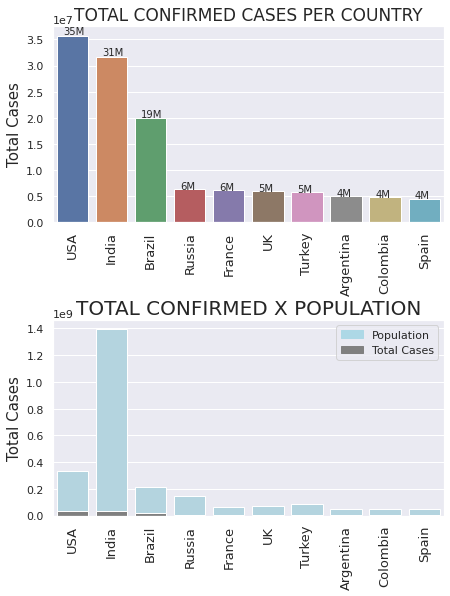

In [60]:
plt.figure(figsize= (7, 9))
sns.set_theme()

plt.subplot(2, 1, 1)
ax = sns.barplot(x= df_summary['country'], 
            y= df_summary['total_confirmed'],
            order= df_summary.sort_values('total_confirmed', ascending= False)['country'][:10],
            )
plt.title('TOTAL CONFIRMED CASES PER COUNTRY', size= 17)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(x + 0.15, y + height * 1.01, '{}M'.format(int(height/1000000)), size= 10)

plt.subplot(2, 1, 2)
ax = sns.barplot(x= df_summary['country'], 
            y= df_summary['population'],
            order= df_summary.sort_values('total_confirmed', ascending= False)['country'][:10], 
            color= 'lightblue')


sns.barplot(x= df_summary['country'], 
            y= df_summary['total_confirmed'],
            order= df_summary.sort_values('total_confirmed', ascending= False)['country'][:10], 
            color= 'gray')

plt.title('TOTAL CONFIRMED X POPULATION', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

population_patch = mpatches.Patch(color='lightblue', label='Population')
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
plt.legend(handles=[population_patch, cases_patch])

plt.subplots_adjust(hspace=0.5)

plt.show()

In [43]:
choropleth(df_summary["total_deaths"],"Deaths","Coronavirus Total Deaths by Countries")

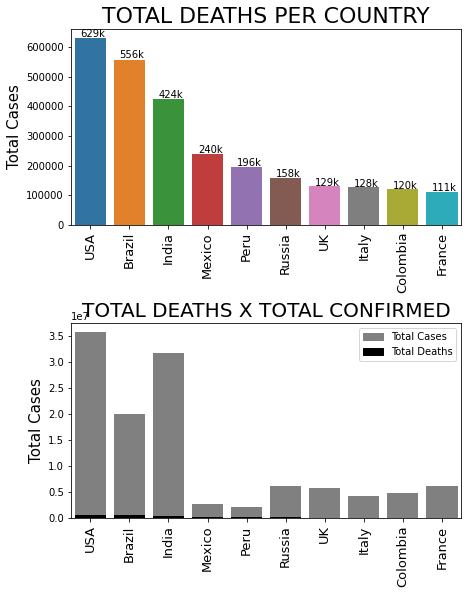

In [56]:
import matplotlib.patches as mpatches

plt.figure(figsize= (7, 9))

plt.subplot(2, 1, 1)
ax = sns.barplot(x= df_summary['country'], 
            y= df_summary['total_deaths'],
            order= df_summary.sort_values('total_deaths', ascending= False)['country'][:10],
            )
plt.title('TOTAL DEATHS PER COUNTRY', size= 22)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)


for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    
    plt.text(x + 0.15, y + height * 1.01, '{}k'.format(int(height/1000)), size= 10)

plt.subplot(2, 1, 2)
sns.barplot(x= df_summary['country'], 
            y= df_summary['total_confirmed'],
            order= df_summary.sort_values('total_deaths', ascending= False)['country'][:10], 
            color= 'gray')
   
sns.barplot(x= df_summary['country'], 
            y= df_summary['total_deaths'],
            order= df_summary.sort_values('total_deaths', ascending= False)['country'][:10], 
            color= 'black')

plt.title('TOTAL DEATHS X TOTAL CONFIRMED', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

    
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
deaths_patch = mpatches.Patch(color='black', label='Total Deaths')
plt.legend(handles=[cases_patch, deaths_patch])
plt.subplots_adjust(hspace=0.5)

plt.show()

In [44]:
choropleth(df_summary["total_recovered"],"Recovered Cases","Coronavirus Recovered Cases")

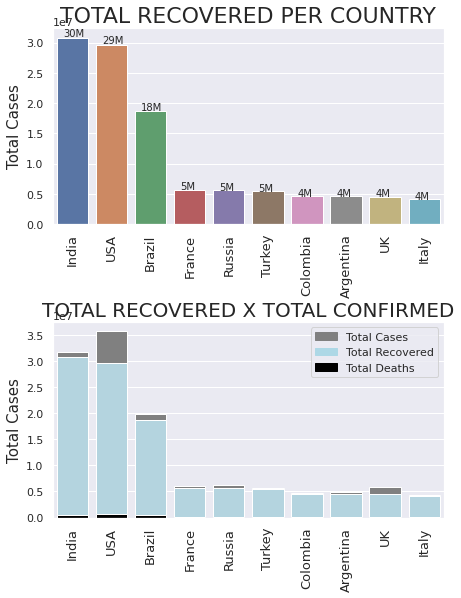

In [62]:
plt.figure(figsize= (7, 9))

plt.subplot(2, 1, 1)
ax = sns.barplot(x= df_summary['country'], 
            y= df_summary['total_recovered'],
            order= df_summary.sort_values('total_recovered', ascending= False)['country'][:10],
            )
plt.title('TOTAL RECOVERED PER COUNTRY', size= 22)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

for patch in ax.patches:
    width = patch.get_width() 
    height= patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(x + 0.15, y + height * 1.01, '{}M'.format(int(height/1000000)), size= 10)

plt.subplot(2, 1, 2)
sns.barplot(x= df_summary['country'], 
            y= df_summary['total_confirmed'],
            order= df_summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'gray')
   
sns.barplot(x= df_summary['country'], 
            y= df_summary['total_recovered'],
            order= df_summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'lightblue')

sns.barplot(x= df_summary['country'], 
            y= df_summary['total_deaths'],
            order= df_summary.sort_values('total_recovered', ascending= False)['country'][:10], 
            color= 'black')

plt.title('TOTAL RECOVERED X TOTAL CONFIRMED', size= 20)
plt.xlabel('')
plt.ylabel('Total Cases', size= 15)
plt.xticks(rotation= 90, size= 13)

    
cases_patch = mpatches.Patch(color='gray', label='Total Cases')
recovered_patch = mpatches.Patch(color='lightblue', label='Total Recovered')
deaths_patch = mpatches.Patch(color='black', label='Total Deaths')
plt.legend(handles=[cases_patch, recovered_patch, deaths_patch])
plt.subplots_adjust(hspace=0.5)

    
plt.show()

In [45]:
choropleth(df_summary["active_cases"],"Active Cases","Coronavirus Active Cases")

4.Coronavirus Cases by Continents

In [46]:
cts = df_summary.groupby("continent",as_index=False)[["total_confirmed","total_deaths","total_recovered","active_cases","serious_or_critical"]].sum()
cts.head(6)

,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical
0,Africa,6762955,170457.0,5904417.0,688081.0,4257.0
1,Asia,62022664,896553.0,58041110.0,3085001.0,33813.0
2,Australia/Oceania,105157,1537.0,77487.0,26133.0,111.0
3,Europe,51498242,1133252.0,46828215.0,3536775.0,7856.0
4,North America,42559808,940299.0,35351307.0,6268202.0,16400.0
5,South America,35533508,1089781.0,31323073.0,1207651.0,25481.0


Countries Worst Affected by Coronavirus and Statistics 

In [49]:
topdeath = df_summary.sort_values(by="total_deaths" ,ascending=False)
topdeath.head(20)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,log(Total Confirmed),mortality_rate,fatality_rate
210,USA,North America,35733967,629290.0,29666084.0,5438593.0,9375.0,107279,1889.0,529577328.0,1589878.0,333093143,25.090793,0.188923,1.761042
26,Brazil,South America,19917855,556370.0,18619542.0,741943.0,8318.0,92993,2598.0,55034721.0,256948.0,214186368,24.247559,0.259760,2.793323
93,India,Asia,31654584,424384.0,30812873.0,417327.0,8944.0,22698,304.0,466427038.0,334451.0,1394605426,24.915911,0.030430,1.340672
129,Mexico,North America,2829443,240456.0,2204109.0,384878.0,4798.0,21700,1844.0,8421353.0,64586.0,130390343,21.432087,0.184412,8.498351
153,Peru,South America,2109294,196291.0,NaN,NaN,1814.0,63029,5865.0,15476472.0,462458.0,33465698,21.008329,0.586544,9.306005
160,Russia,Europe,6265873,158563.0,5608619.0,498691.0,2300.0,42916,1086.0,165300000.0,1132177.0,146001924,22.579084,0.108603,2.530581
206,UK,Europe,5856528,129654.0,4508650.0,1218224.0,869.0,85785,1899.0,244114700.0,3575718.0,68270129,22.481614,0.189913,2.213837
100,Italy,Europe,4350028,128063.0,4134680.0,87285.0,214.0,72061,2121.0,77544194.0,1284568.0,60365948,22.052593,0.212144,2.943958
45,Colombia,South America,4785320,120723.0,4578519.0,86078.0,8155.0,92979,2346.0,22533319.0,437825.0,51466439,22.190184,0.234566,2.522778
71,France,Europe,6127019,111867.0,5700815.0,314337.0,1099.0,93644,1710.0,104611244.0,1598847.0,65429176,22.546754,0.170974,1.825798
